In [36]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from distgen import Generator
from distgen.plot import plot_dist1d, plot_dist2d

gen = Generator('distgen.in.yaml', verbose=1)
beam = gen.beam()

Distribution format: None
Output file: None

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 2.5 nC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 1.41421 mm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 288.675 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -0.000298907 mm -> 0 mm
   Scaling sigma_x = 0.999842 mm -> 1 mm
   Shifting avg_y = -5.54847E-05 mm -> 0 mm
   Scaling sigma_y = 1.00015 mm -> 1 mm
   Shifting avg_px = -0.256036 eV/c -> 0 eV/c
   Scaling sigma_px = 276.783 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.399525 eV/c -> 0 eV/c
   Scaling sigma_py = 276.803 eV/c 

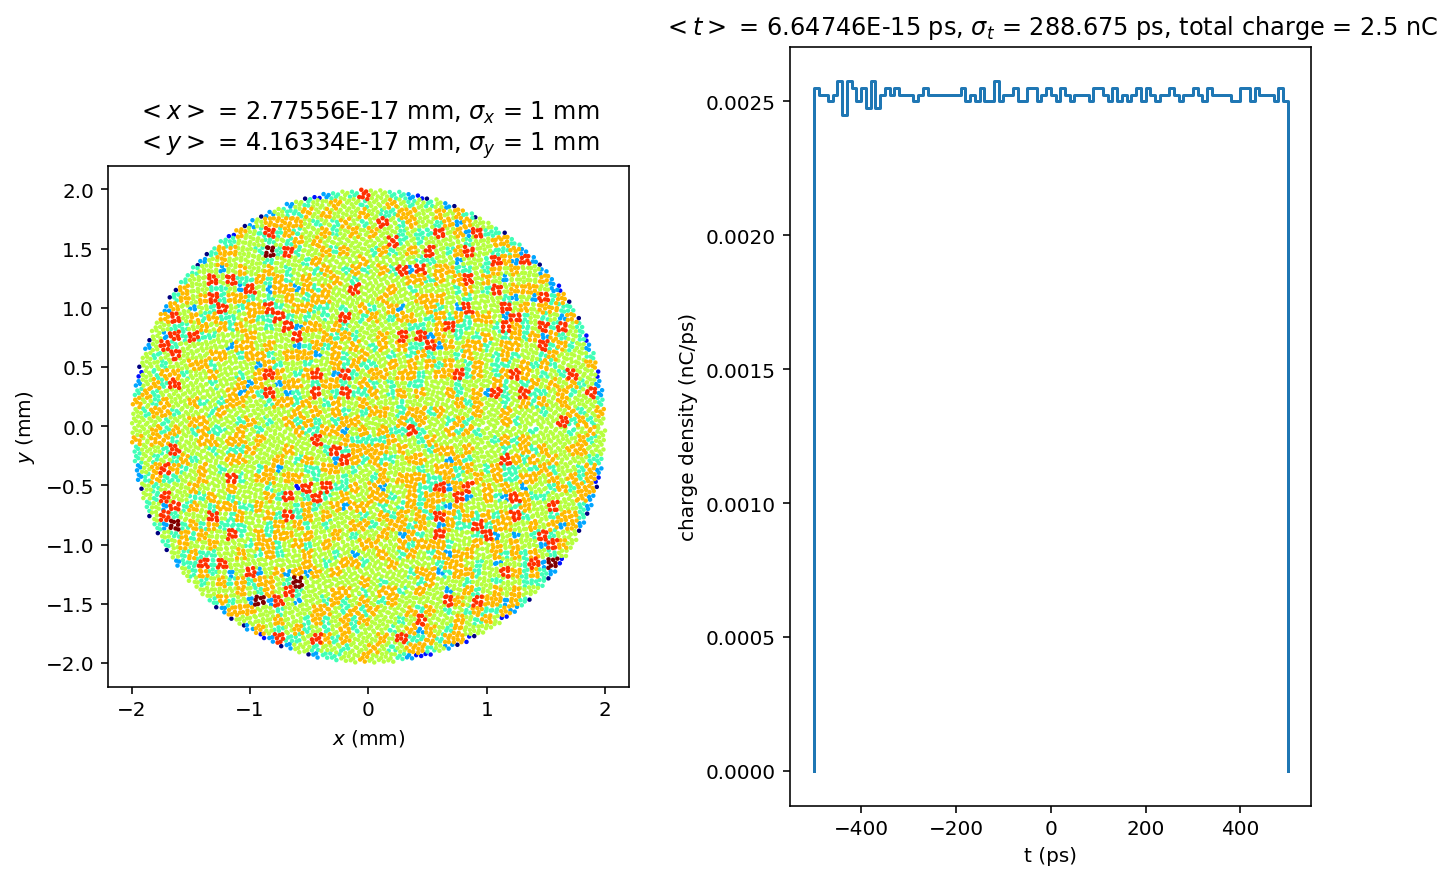

In [40]:
fig, ax = plt.subplots(1,2,sharex='col',constrained_layout=True, figsize=[10,6])

plot_dist2d(beam, 'x', 'mm', 'y', 'mm', nbins=50, ax=ax[0], title_on=True, axis='equal')
plot_dist1d(beam, 't', 'ps', nbins=100, ax=ax[1], title_on=True)


In [41]:
from gpt.gpt_distgen import run_gpt_with_distgen

settings={
    'n_particle':200,
    'Ntout':500,
    'CAV01_scale': 2,
    'CAV02_scale': 1,
    'CAV03_scale': 3/9,
    'CAV01_relative_phase':0,
    'CAV02_relative_phase':0,
    'CAV03_relative_phase':0,
}

G = run_gpt_with_distgen(settings,
                         gpt_input_file='gpt.in',
                         distgen_input_file='distgen.in.yaml',
                         verbose=True,
                         auto_phase=True,
                         gpt_verbose=False,
                         timeout=1e6)

Run GPT with Distgen:
Replacing param n_particle with value 200
Ntout is in gpt
CAV01_scale is in gpt
CAV02_scale is in gpt
CAV03_scale is in gpt
CAV01_relative_phase is in gpt
CAV02_relative_phase is in gpt
CAV03_relative_phase is in gpt
Linking particle files, distgen output will point to -> "gpt.particles.gdf" in working directory.

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp9zkz_num/gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 2.5 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 1.41421 mm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 288.675 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV

ValueError: GPT PHASING ERROR: No screen output found. GPT crashed? See last print out above.